# Import OpenVisus

In [1]:
import os,sys
sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as  ov
from OpenVisus.dashboards import Slice,Slices
from OpenVisus.pyquery import PyQuery
os.environ["VISUS_NETSERVICE_VERBOSE"]="0"
print("OpenVisus imported")


OpenVisus imported


# Load Dataset

In [2]:
url=f"http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1&cached=1"
db=ov.LoadDataset(url)  
print(f"""
Loaded dataset 
   url={db.getUrl()} 
   fields={db.getFields()} 
   logic_box={db.getLogicBox()}
""")
W,H,D=db.getLogicBox()[1]


Loaded dataset 
   url=http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1 
   fields=['DATA'] 
   logic_box=([0, 0, 0], [2048, 2048, 2048])



# Extract data

In [3]:
def ReadData(logic_box=None,max_pixels=128*128*128, timestep=None, verbose=True): 
    for (I,N,t,fieldname, logic_box, data, msec) in PyQuery.read(db, logic_box=logic_box, timestep=timestep, max_pixels=max_pixels,num_refinements=1):
        if verbose: print(f"Got data shape={data.shape} dtype={data.dtype} msec={msec}")
        return data
    return None

data=ReadData(logic_box=[[0,0,0],[W,H,D]], timestep=0,max_pixels=128*128*128)

Got data shape=(128, 128, 128) dtype=uint8 msec=395


# Show volume in itkwidgets


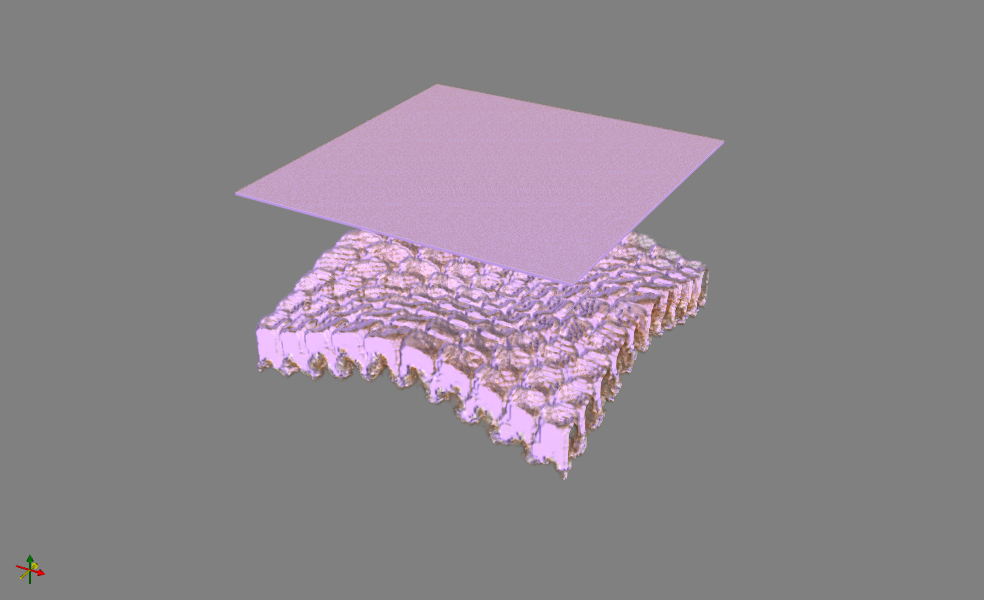
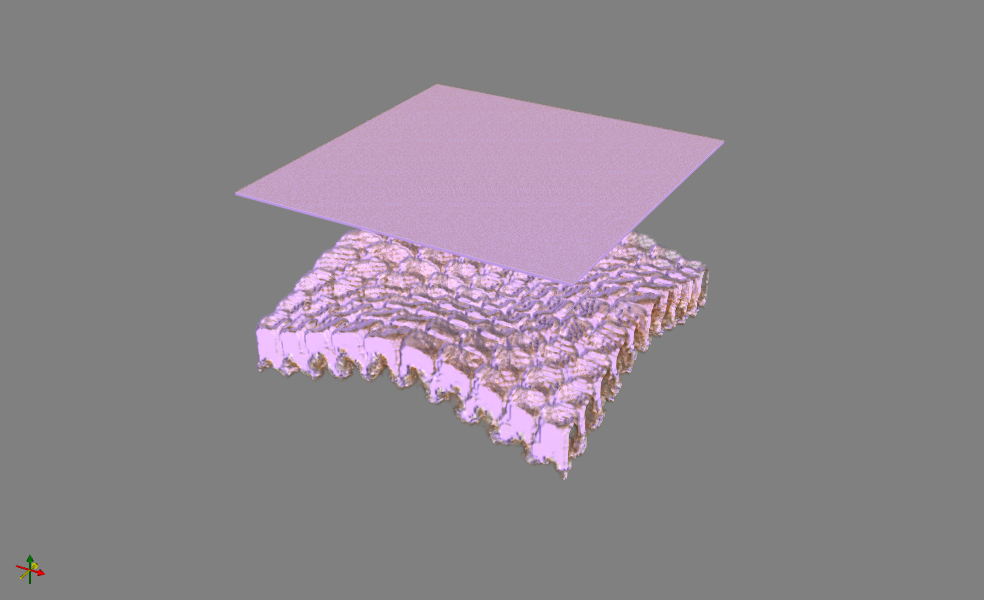

<IPython.core.display.Javascript object>

In [4]:
from itkwidgets import view
view(data)